In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
from pathlib import Path

import biograpy
from Bio.SeqFeature import SeqFeature, FeatureLocation
from Bio.Seq import Seq

savefig = True

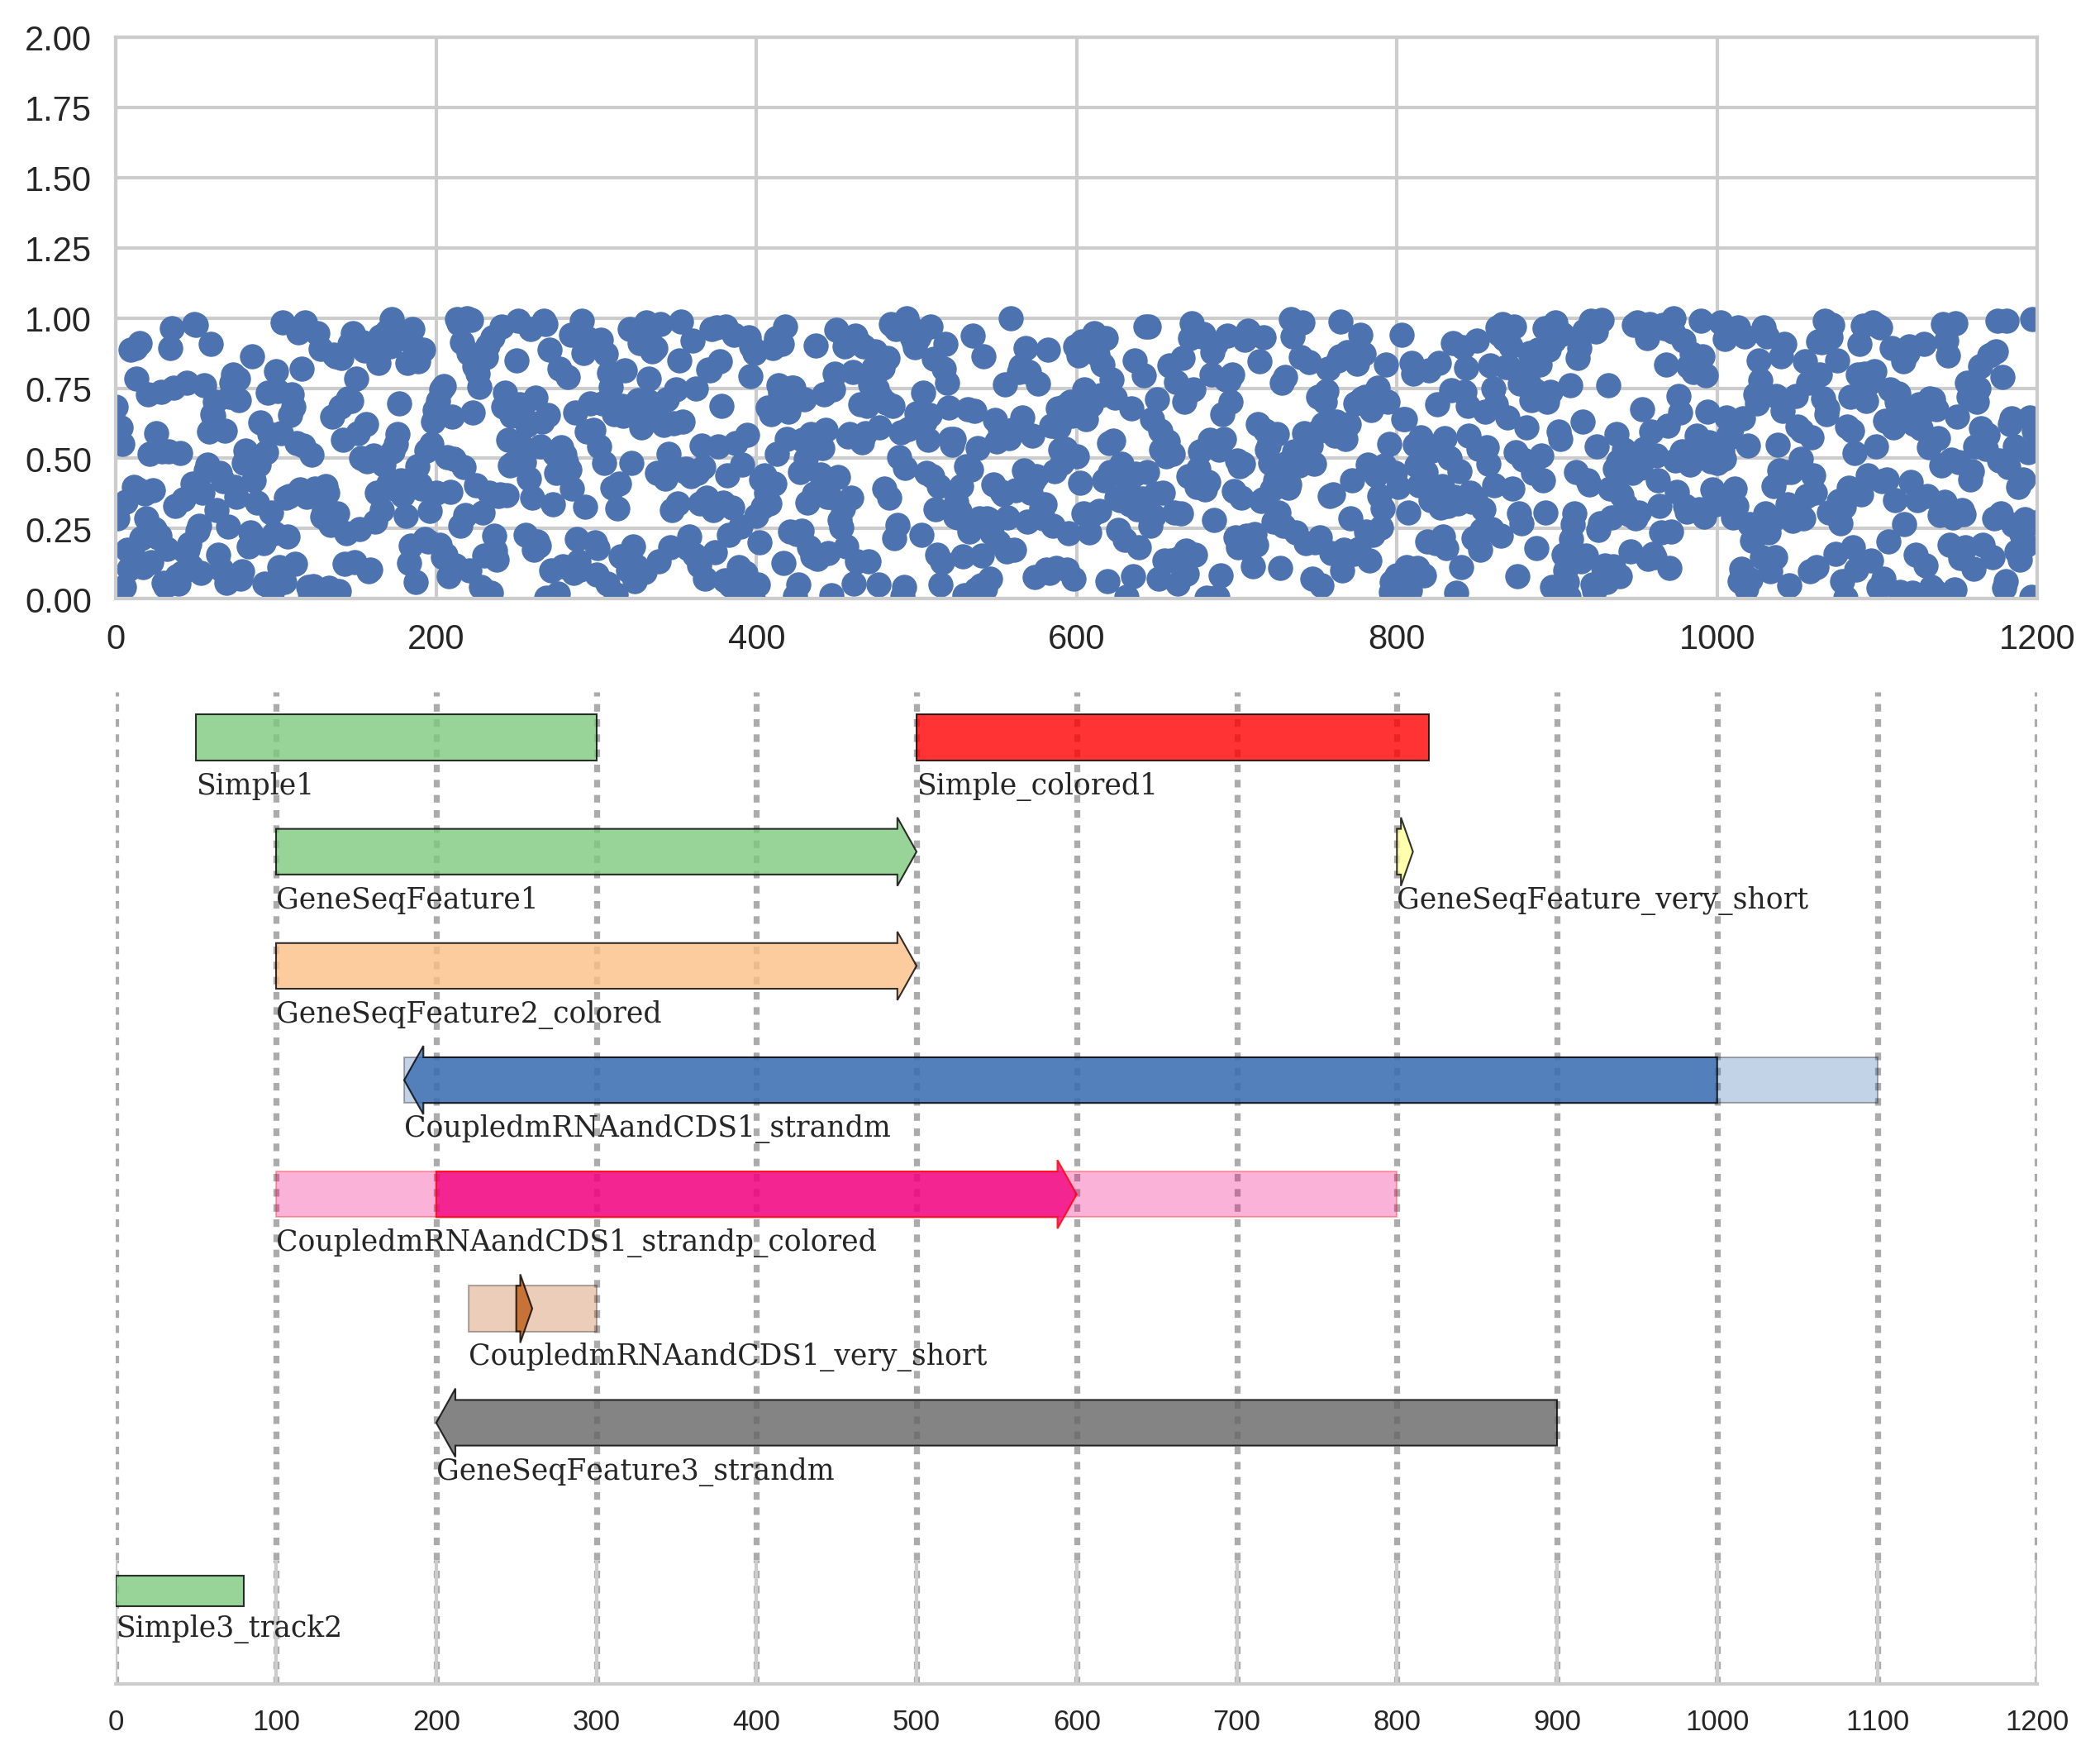

In [5]:
if True:
    fig1, ax = plt.subplots(figsize=(10,3), dpi=300)

    ax.scatter(x=list(range(0, 1200)), y=np.random.random(1200))
    ax.set_xlim([0,1200])
    ax.set_ylim([0,2])

    # We use the package biograpy to create Panel, tracks, and features
    panel = biograpy.Panel(fig1)
    track = biograpy.tracks.BaseTrack()

    # Simple feature drawn as a rectangle
    track.add_feature(biograpy.features.Simple(name='Simple1', start = 50, end = 300))

    # Gene feature drawn as an arrow
    genefeat = SeqFeature(FeatureLocation(100,500), type='gene', strand=1)
    track.add_feature(biograpy.features.GeneSeqFeature(genefeat, name='GeneSeqFeature1'))

    # Simple feature with color
    track.add_feature(biograpy.features.Simple(name='Simple_colored1', start = 500, end = 820, color_by_cm=False, fc='r'))

    # Gene feature with color
    track.add_feature(biograpy.features.GeneSeqFeature(genefeat,name='GeneSeqFeature2_colored',fc='r'))

    # Very short gene feature (to test the arrow head automatic sizing)
    genefeat = SeqFeature(FeatureLocation(800,810), type='gene', strand=1)
    track.add_feature(biograpy.features.GeneSeqFeature(genefeat, name='GeneSeqFeature_very_short'))

    # mRNA with one CDS drawn as a shaded rectangle with an arrow on top
    CDS_feature = SeqFeature(FeatureLocation(180,1000), type='CDS', strand=-1)
    mRNA_feature = SeqFeature(FeatureLocation(180,1100), type='mRNA', strand=-1)
    mRNAandCDSfeat = biograpy.features.CoupledmRNAandCDS(mRNA_feature, CDS_feature, name='CoupledmRNAandCDS1_strandm', ec='k')
    track.add_feature(mRNAandCDSfeat)

    # mRNA with CDS, custom color
    CDS_feature = SeqFeature( FeatureLocation(200,600), type='CDS', strand=1)
    mRNA_feature = SeqFeature( FeatureLocation(100,800), type='mRNA', strand=1)
    mRNAandCDSfeat = biograpy.features.CoupledmRNAandCDS(mRNA_feature, CDS_feature, name='CoupledmRNAandCDS1_strandp_colored', ec='r', fc='r')
    track.add_feature(mRNAandCDSfeat)

    # Very short mRNA with CDS (to test the arrow head automatic sizing)
    CDS_feature = SeqFeature( FeatureLocation(250,260), type='CDS', strand=1)
    mRNA_feature = SeqFeature( FeatureLocation(220,300), type='mRNA', strand=1)
    mRNAandCDSfeat = biograpy.features.CoupledmRNAandCDS(mRNA_feature, CDS_feature, name='CoupledmRNAandCDS1_very_short')
    track.add_feature(mRNAandCDSfeat)

    # Gene feature on minus strand
    geneSeqfeat = SeqFeature( FeatureLocation(900,200), type = 'gene', strand=-1)
    genefeat = biograpy.features.GeneSeqFeature(geneSeqfeat, name='GeneSeqFeature3_strandm')
    track.add_feature(genefeat)

    track2 = biograpy.tracks.BaseTrack(biograpy.features.Simple(name='Simple3_track2', start= 0, end = 80))

    panel.add_track(track)
    panel.add_track(track2)
    if savefig:
        panel.save('biograpy_test1.png')
#         panel.close()
    else:
        panel._draw_tracks()

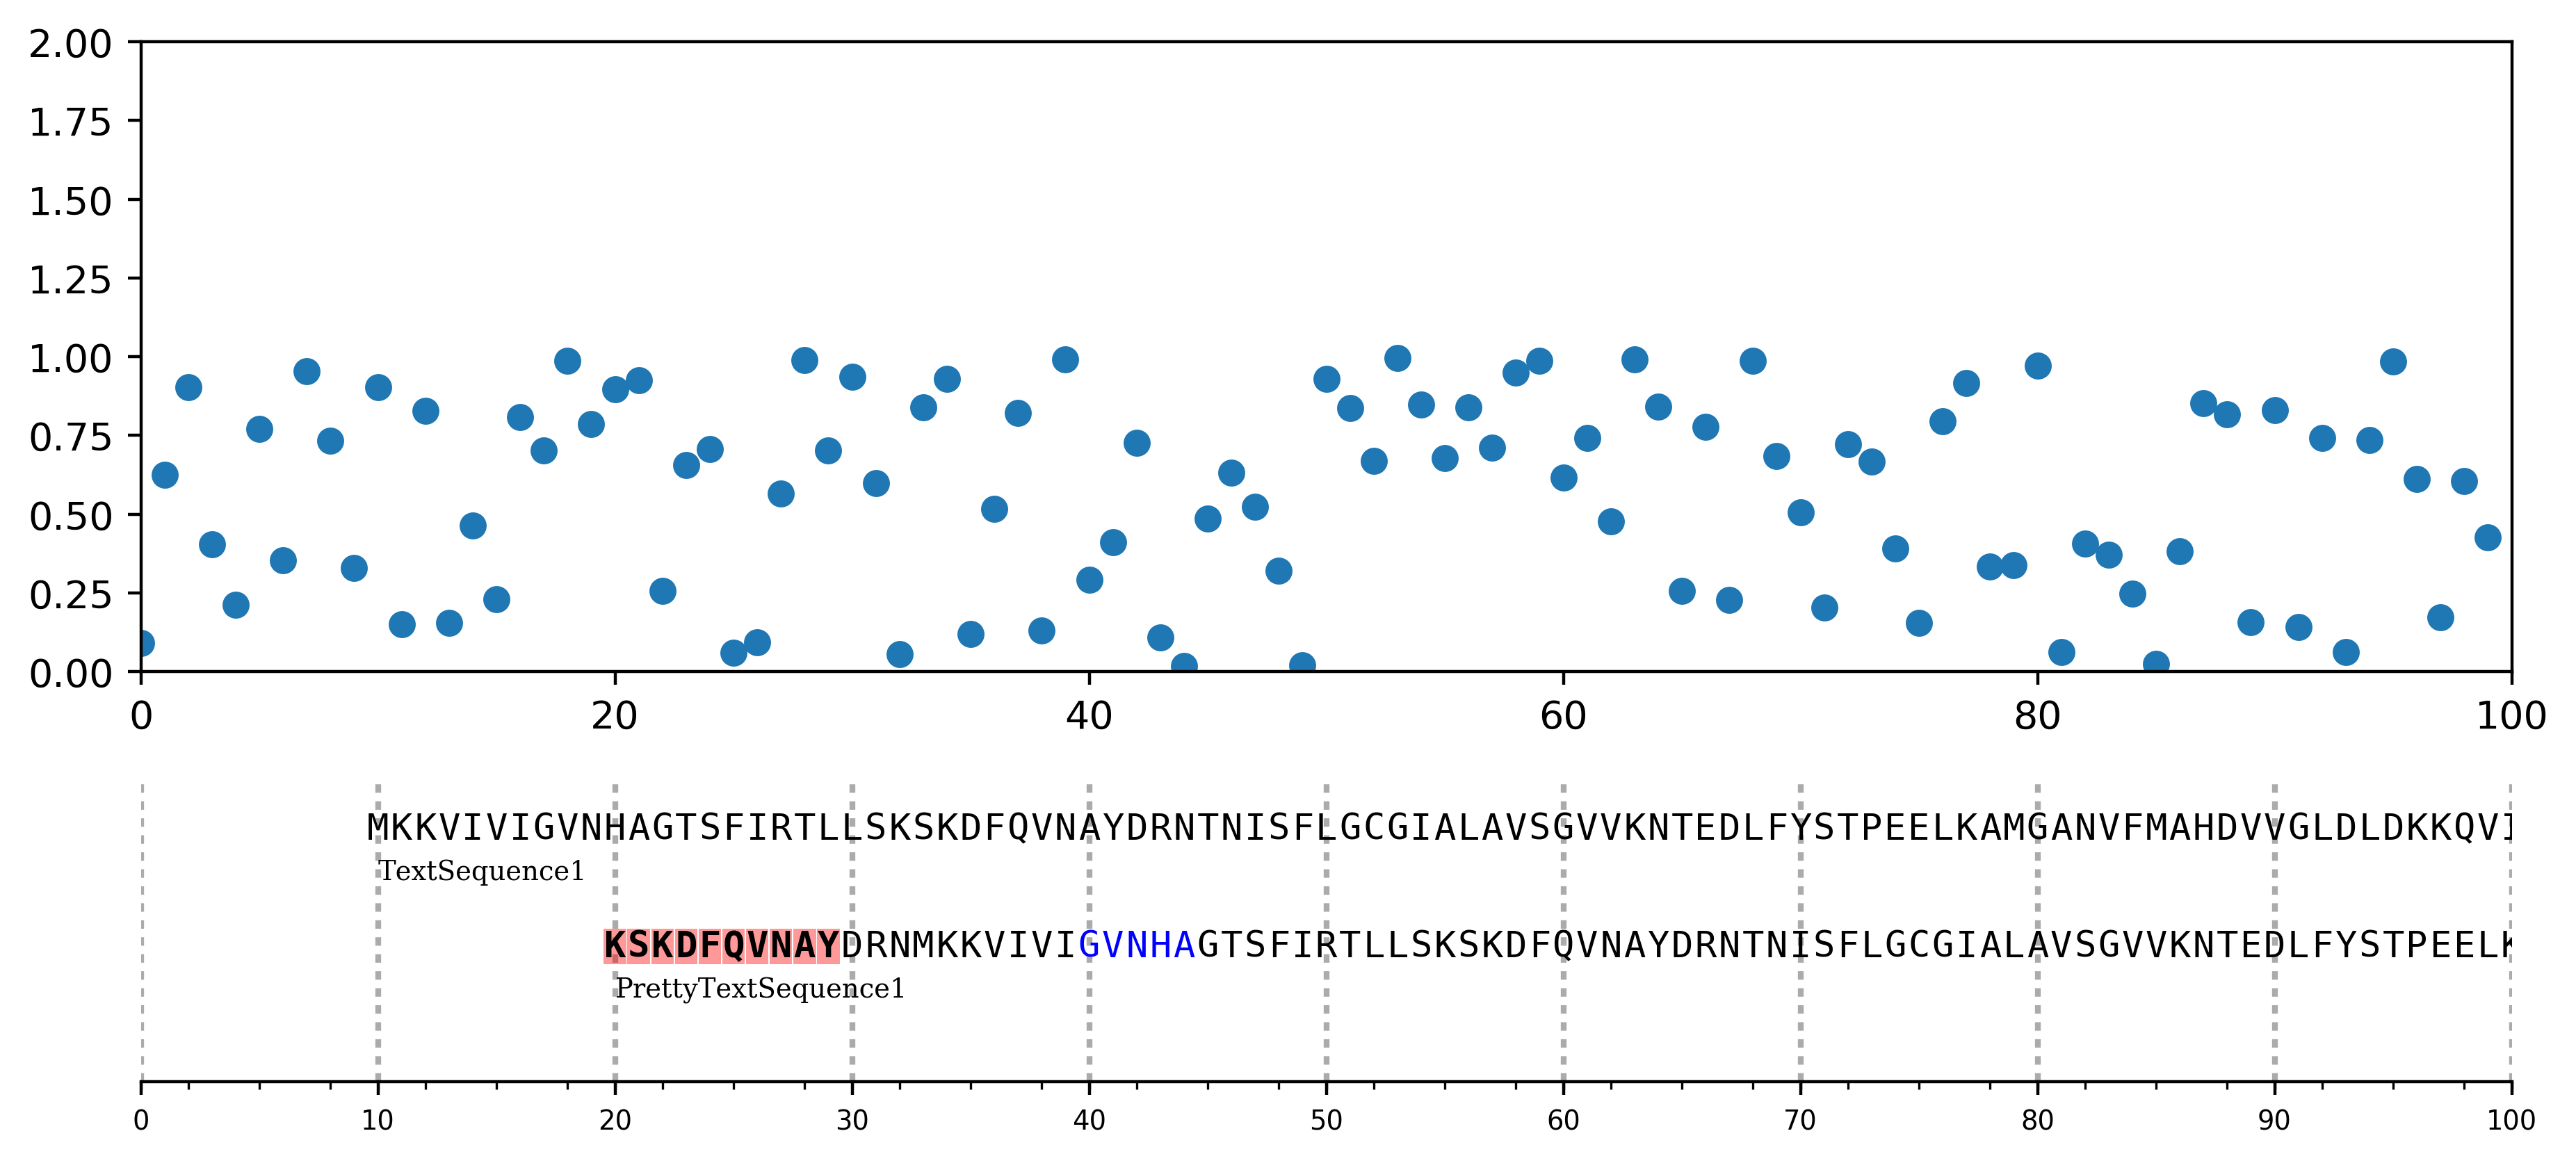

In [3]:
if True:
    
    ##############################################
    
    fig1, ax = plt.subplots(figsize=(11,3), dpi=400)

    ax.scatter(x=list(range(0, 100)), y=np.random.random(100))
    ax.set_xlim([0,100])
    ax.set_ylim([0,2])

    # Create panel and track
    panel = biograpy.Panel(fig1)
    track = biograpy.tracks.BaseTrack()

    # Text sequence feature
    track.add_feature(biograpy.features.TextSequence(
            'MKKVIVIGVNHAGTSFIRTLLSKSKDFQVNAYDRNTNISFLGCGIALAVSGVVKNTEDLFYSTPEELKAMGANVFMAHDVVGLDLDKKQVIVKDL',
            start=10, name="TextSequence1"))

    """
    Pretty text sequence feature allows to pass a text sequence together with a list of regions to highlight.
    
    There is one limitation to our text features, is that the font size is calculated when creating the
    PrettyTextSequence object, based on the current axis. Therefore, we cannot re-use the PrettyTextSequence
    in another Panel, for example. Possibly in another track with the same dimensions should be ok.
    """
    
    prettyTextFeat = biograpy.features.PrettyTextSequence(
        'KSKDFQVNAYDRNMKKVIVIGVNHAGTSFIRTLLSKSKDFQVNAYDRNTNISFLGCGIALAVSGVVKNTEDLFYSTPEELKAMGANVFMAHDVVGLDLDKKQVIVKDLATGKETVDHY',
        highlightList=[{'start':0, 'end':10, 'background_color':'red', 'background_color_alpha':0.4, 'weight':900},
                       {'start':20, 'end':25, 'foreground_color':'blue', 'weight':100}
                      ],
        start=20, name='PrettyTextSequence1')
    track.add_feature(prettyTextFeat)
    

    """
    Alternativley, pretty text sequence feature can be passed a list of (char, propArgsDict), where propArgsDict defines
    all the matplotlib text properties.
    """
#     prettyTextFeat = biograpy.features.PrettyTextSequence(
#         list('KSKDFQVNAYDRN') +
#         [('A', {'fontproperties':FontProperties(**{'weight':'bold'}), 'size':20}),
#         ('A', {})] + list('CGIALAVTE') +
#         [(c, {'bbox':dict(facecolor='blue', alpha=0.4, edgecolor='none', pad=0.0)}) for c in list('ATGCATGC')] +
#         list('KSKDFQVNAYDRN') +
#         [(c, {'color':'red'}) for c in list('ATGCATGC')] +
#         list('MKKVIVIGVNHAGTSFIRTLLSKSKDFQVNAYDRNTNISFLGCGIALAVSGVVKNTEDLFYSTPEELKAMGANVFMAHDVVGLDLDKKQVIVKDLATGKETVDHY'),
#         start=25, name='PrettyTextSequence2')
#     track.add_feature(prettyTextFeat)

    panel.add_track(track)
    if savefig:
        panel.save('biograpy_test2.png')
#         panel.close()
    else:
        panel._draw_tracks()

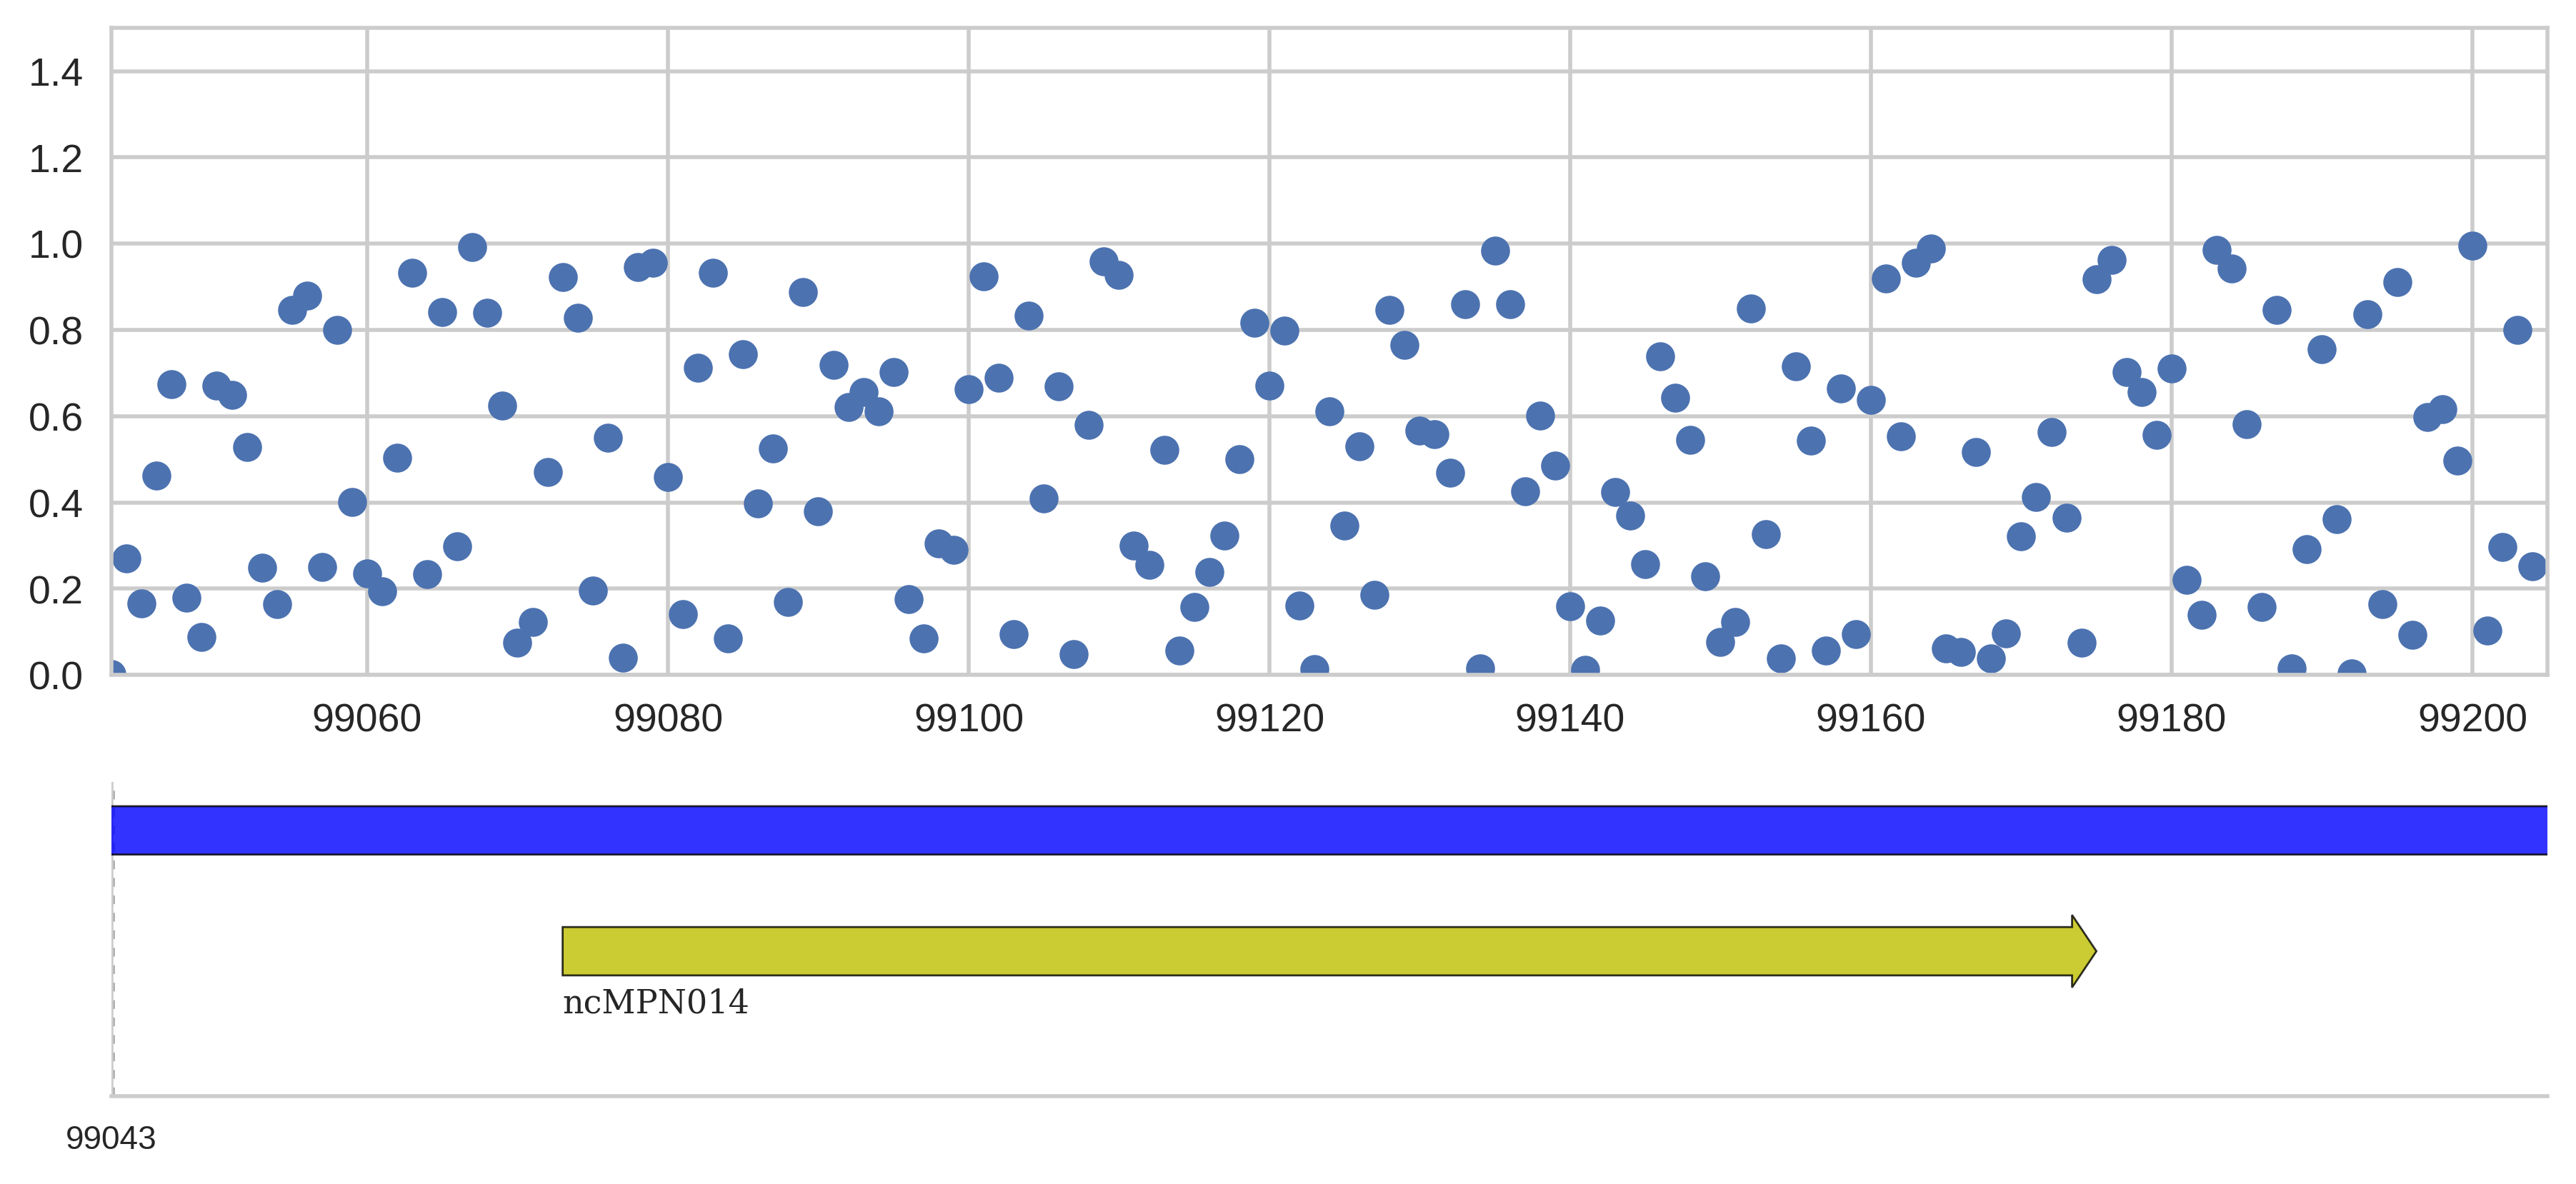

In [4]:
if True:

    ##############################################

    # We also test the MPN annotations
    import json
    import pandas as pd
    from mwTools.mpn_annotation_tools import plot_add_annotations
    from mwTools.paths import p
    p = p('isis')
    mpnAnnotationPath = p.mpnAnnotationPath

    # Import annotations
    with (mpnAnnotationPath / 'mpnAnnotFeaturesDf8_colList.json').open('r') as f:
        colList = json.load(f)

    mpnAnnotFeaturesDf = pd.read_csv(str(mpnAnnotationPath / 'mpnAnnotFeaturesDf8.csv'), index_col=0)\
                           .sort_values(['feature', 'start', 'end', 'strand'])
    if len(colList) != len(mpnAnnotFeaturesDf.columns):
        print("ERROR: manual column list does not have the same number of columns than the dataframe.")
    else:
        mpnAnnotFeaturesDf = mpnAnnotFeaturesDf[colList]

    mpnPlot = mpnAnnotFeaturesDf[(mpnAnnotFeaturesDf.id == 'ncMPN014') &
                                 (mpnAnnotFeaturesDf.feature == 'ncRNA')
                                ].iloc[0]

    xPad = 30
    x0 = mpnPlot['start'] - xPad
    x1 = mpnPlot['end'] + xPad

    fig1, ax = plt.subplots(figsize=(11,3), dpi=400)
    ax.scatter(x=list(range(x0, x1)), y=np.random.random(x1 - x0))
    ax.set_xlim([x0, x1])
    ax.set_ylim([0, 1.5])

    DNAFeatList = [('ncMPN015',
        [{'start':53 + mpnPlot['start'], 'end':56 + mpnPlot['start'],
          'fontPropDict':{'bbox':dict(facecolor='red', alpha=0.4, edgecolor='blue', pad=0.0)}},
         {'start':3 + mpnPlot['start'], 'end':6 + mpnPlot['start'], 'highlightColor':'red'}
        ]
                    )]

    plot_add_annotations(ax=ax, fig=fig1, mpnAnnotFeaturesDf=mpnAnnotFeaturesDf, ncRNA=True, idCol='id',
                         DNAFeatList=DNAFeatList)

    if savefig:
        fig1.savefig('biograpy_test3.png')